## Carprice Assignment - Linear Regression

### Importing and Understanding Data

In [216]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format','{:.4f}'.format)


In [217]:
carprice = pd.read_csv('C:/Users/483582/Documents/LR/CarPrice_Assignment.csv')

#Print and check for the dataframe create
carprice

car_ID  symboling                          CarName fueltype aspiration  \
0         1          3               alfa-romero giulia      gas        std   
1         2          3              alfa-romero stelvio      gas        std   
2         3          1         alfa-romero Quadrifoglio      gas        std   
3         4          2                      audi 100 ls      gas        std   
4         5          2                       audi 100ls      gas        std   
5         6          2                         audi fox      gas        std   
6         7          1                       audi 100ls      gas        std   
7         8          1                        audi 5000      gas        std   
8         9          1                        audi 4000      gas      turbo   
9        10          0              audi 5000s (diesel)      gas      turbo   
10       11          2                         bmw 320i      gas        std   
11       12          0                         bmw 320i      gas        std   
12       13          0                           bmw x1      gas        std   
13       14          0                           bmw x3      gas        std   
14       15          1                           bmw z4      gas        std   
15       16          0                           bmw x4      gas        std   
16       17          0                           bmw x5      gas        std   
17       18          0                           bmw x3      gas        std   
18       19          2                 chevrolet impala      gas        std   
19       20          1            chevrolet monte carlo      gas        std   
20       21          0              chevrolet vega 2300      gas        std   
21       22          1                    dodge rampage      gas        std   
22       23          1              dodge challenger se      gas        std   
23       24          1                       dodge d200      gas      turbo   
24       25          1                dodge monaco (sw)      gas        std   
25       26          1               dodge colt hardtop      gas        std   
26       27          1                  dodge colt (sw)      gas        std   
27       28          1             dodge coronet custom      gas      turbo   
28       29         -1                dodge dart custom      gas        std   
29       30          3        dodge coronet custom (sw)      gas      turbo   
30       31          2                      honda civic      gas        std   
31       32          2                 honda civic cvcc      gas        std   
32       33          1                      honda civic      gas        std   
33       34          1                honda accord cvcc      gas        std   
34       35          1                 honda civic cvcc      gas        std   
35       36          0                  honda accord lx      gas        std   
36       37          0              honda civic 1500 gl      gas        std   
37       38          0                     honda accord      gas        std   
38       39          0                 honda civic 1300      gas        std   
39       40          0                    honda prelude      gas        std   
40       41          0                     honda accord      gas        std   
41       42          0                      honda civic      gas        std   
42       43          1               honda civic (auto)      gas        std   
43       44          0                       isuzu MU-X      gas        std   
44       45          1                     isuzu D-Max       gas        std   
45       46          0              isuzu D-Max V-Cross      gas        std   
46       47          2                     isuzu D-Max       gas        std   
47       48          0                        jaguar xj      gas        std   
48       49          0                        jaguar xf      gas        std   
49       50          0                        jaguar xk

In [218]:
carprice['CarName'] = carprice['CarName'].apply(lambda x : x.split(' ')[0])

In [219]:
carprice['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
maxda           2
vw              2
renault         2
porcshce        1
toyouta         1
Nissan          1
vokswagen       1
mercury         1
Name: CarName, dtype: int64

## Data Cleaning 

In [220]:
carprice['CarName'] = carprice['CarName'].replace('maxda','mazda')
carprice['CarName'] = carprice['CarName'].replace('Nissan','nissan')
carprice['CarName'] = carprice['CarName'].replace('porcshce','porsche')
carprice['CarName'] = carprice['CarName'].replace('toyouta','toyota')
carprice['CarName'] = carprice['CarName'].replace('vokswagen','volkswagen')
carprice['CarName'] = carprice['CarName'].replace('vw','volkswagen')

In [221]:
carprice.drop('car_ID', axis = 1, inplace= True)

In [222]:
carprice.head()

symboling      CarName fueltype aspiration doornumber      carbody  \
0          3  alfa-romero      gas        std        two  convertible   
1          3  alfa-romero      gas        std        two  convertible   
2          1  alfa-romero      gas        std        two    hatchback   
3          2         audi      gas        std       four        sedan   
4          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front    88.6000   168.8000   64.1000    48.8000   
1        rwd          front    88.6000   168.8000   64.1000    48.8000   
2        rwd          front    94.5000   171.2000   65.5000    52.4000   
3        fwd          front    99.8000   176.6000   66.2000    54.3000   
4        4wd          front    99.4000   176.6000   66.4000    54.3000   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi     3.4700   
1        2548       dohc           four         130       mpfi     3.4700   
2        2823       ohcv            six         152       mpfi     2.6800   
3        2337        ohc           four         109       mpfi     3.1900   
4        2824        ohc           five         136       mpfi     3.1900   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0  2.6800            9.0000         111     5000       21          27   
1  2.6800            9.0000         111     5000       21          27   
2  3.4700            9.0000         154     5000       19          26   
3  3.4000           10.0000         102     5500       24          30   
4  3.4000            8.0000         115     5500       18          22   

       price  
0 13495.0000  
1 16500.0000  
2 16500.0000  
3 13950.0000  
4 17450.0000

In [223]:
categorical_var = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']

## Analysing the carprice data using pairplot

<Figure size 1440x504 with 0 Axes>

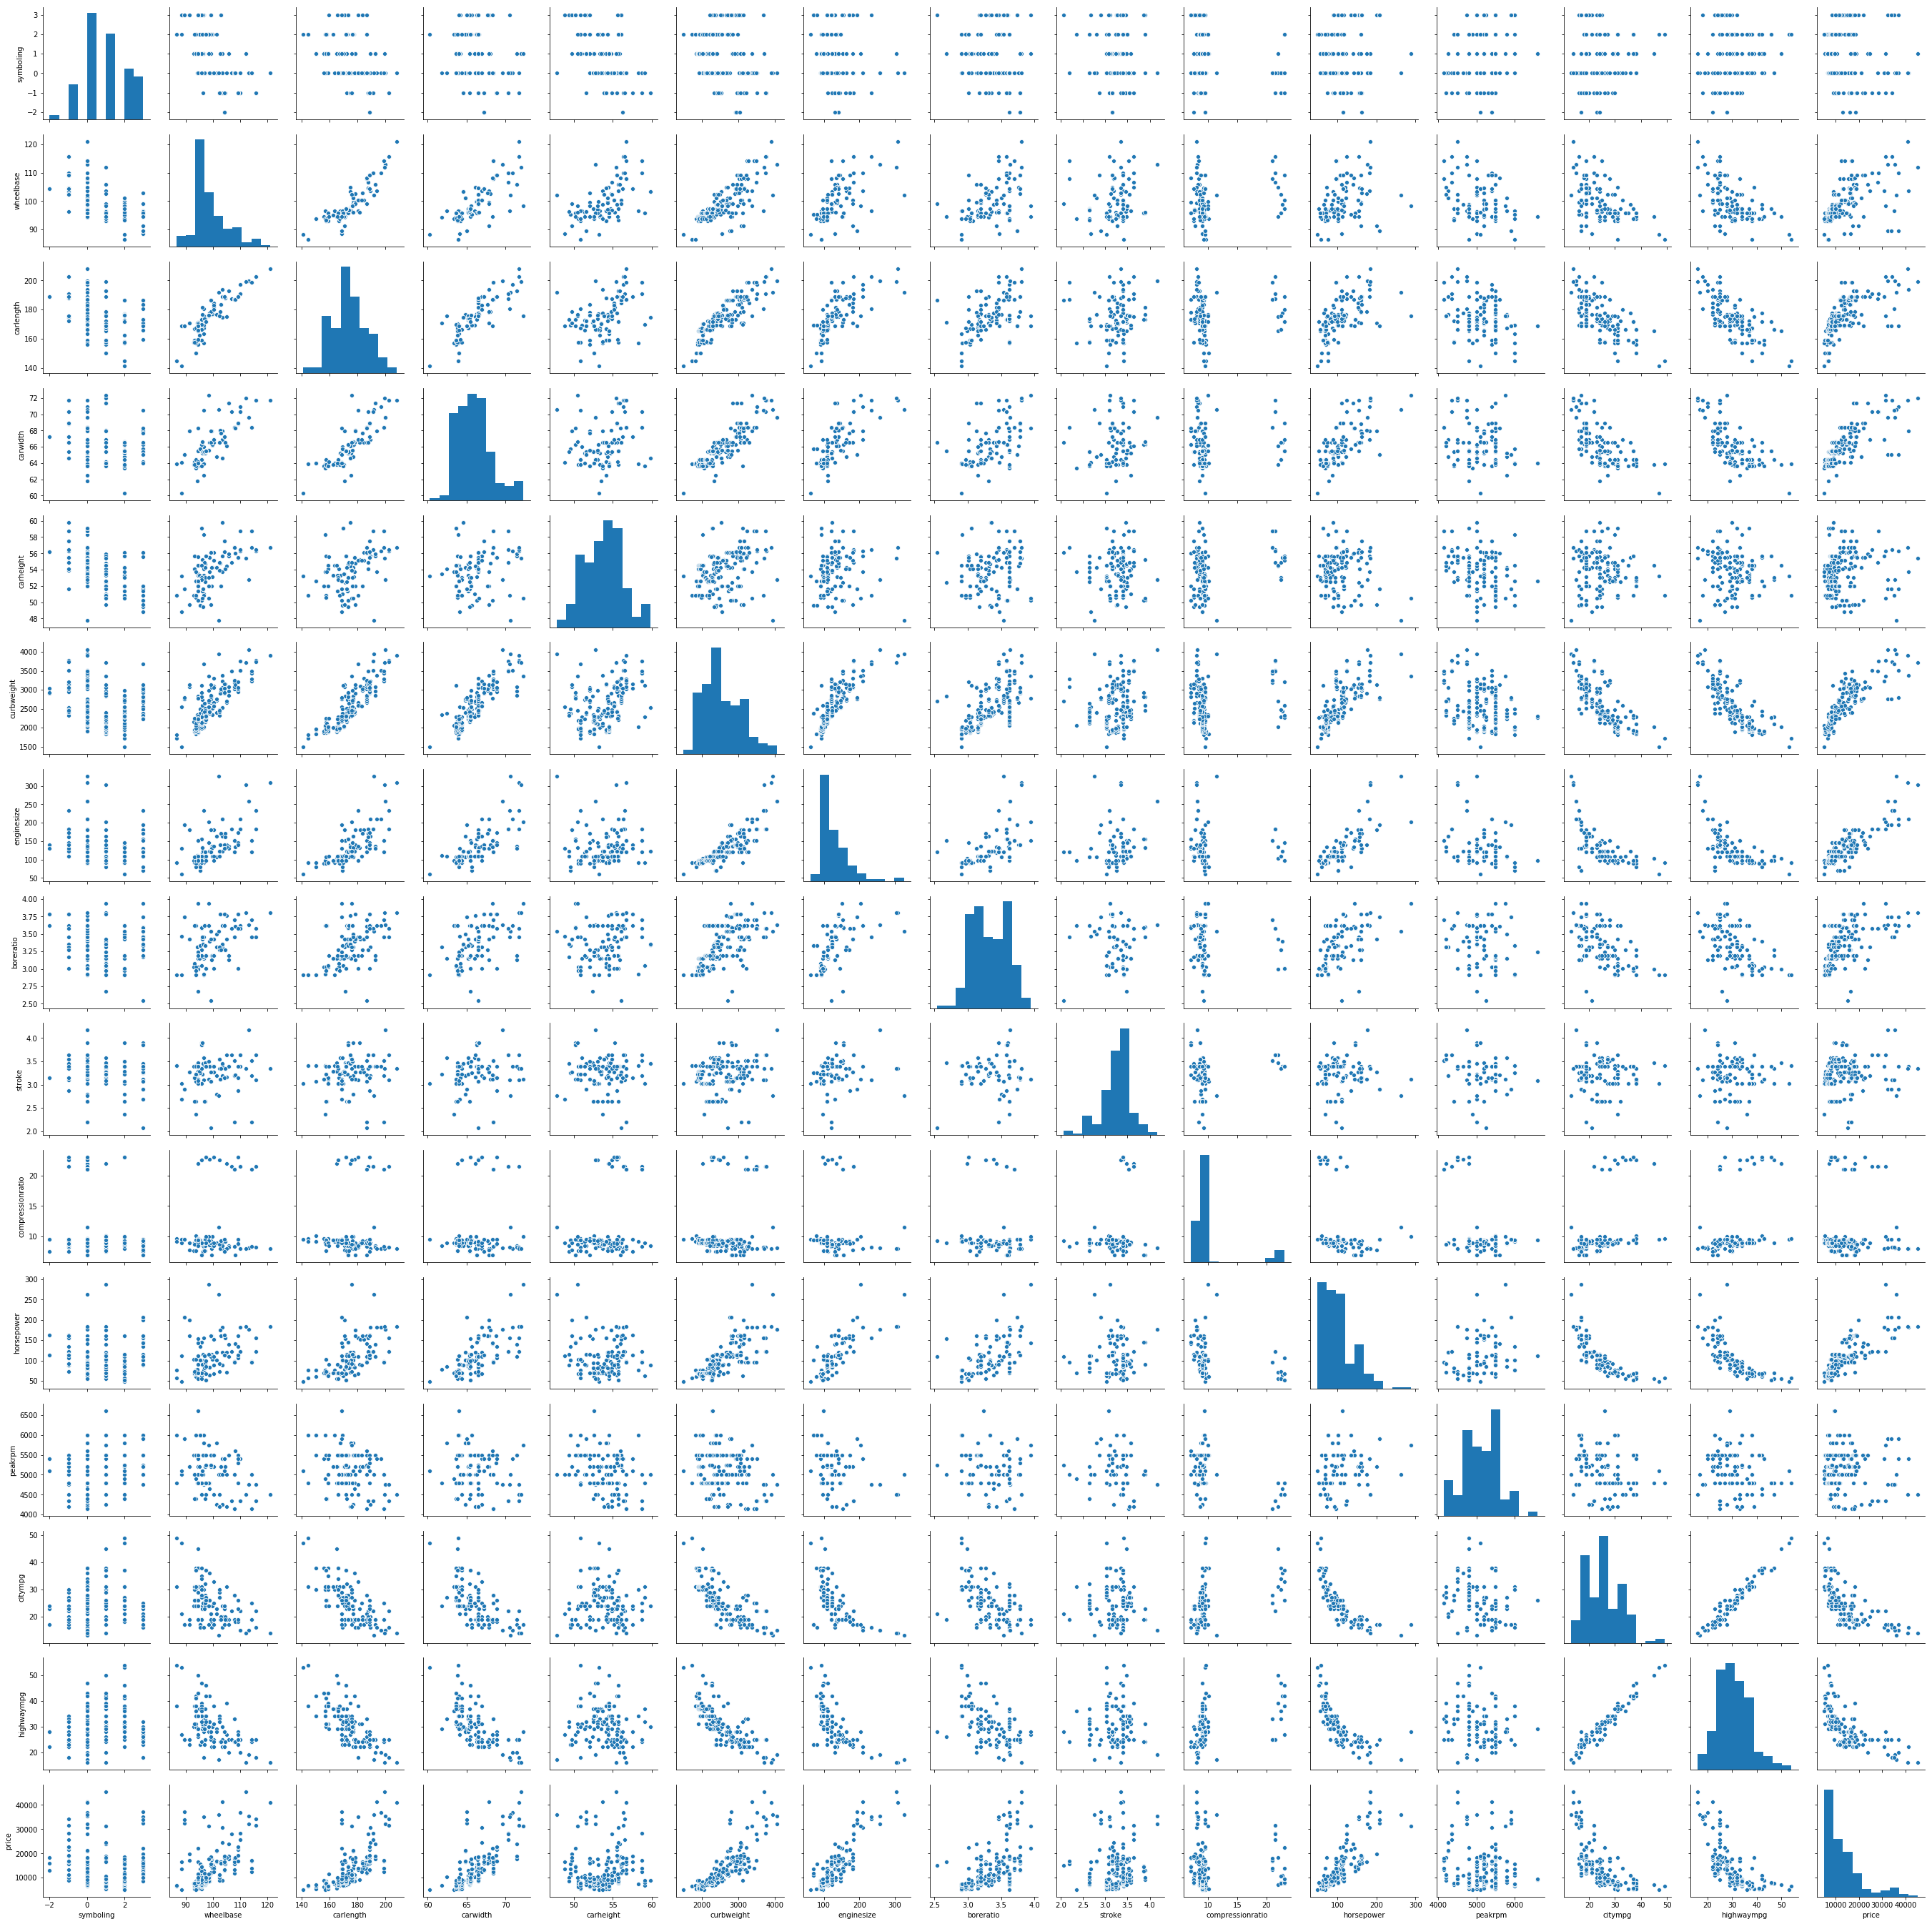

In [224]:
plt.figure(figsize=(20, 7))
sns.pairplot(carprice)
plt.show()

In [225]:
num_var1 = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'price']
num_var2 = [ 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

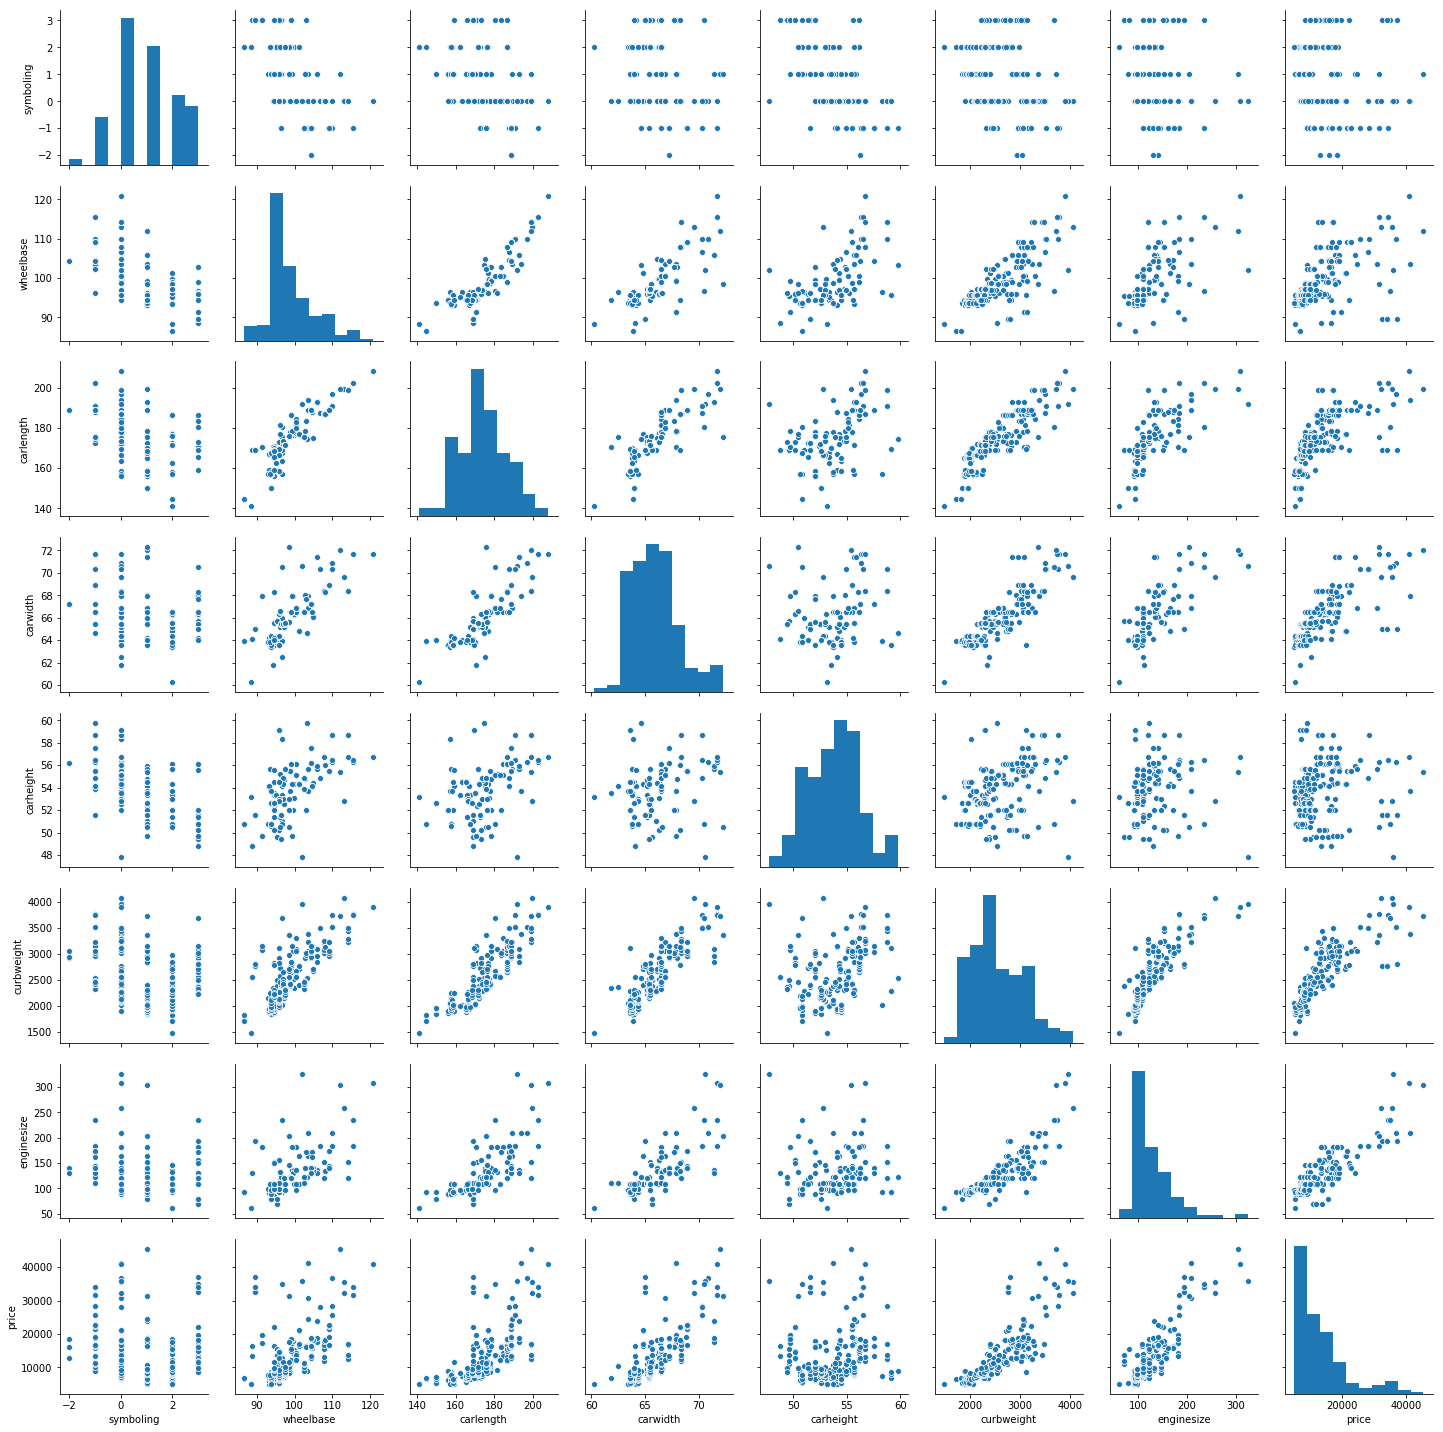

In [226]:
sns.pairplot(carprice, vars= num_var1)

plt.show()

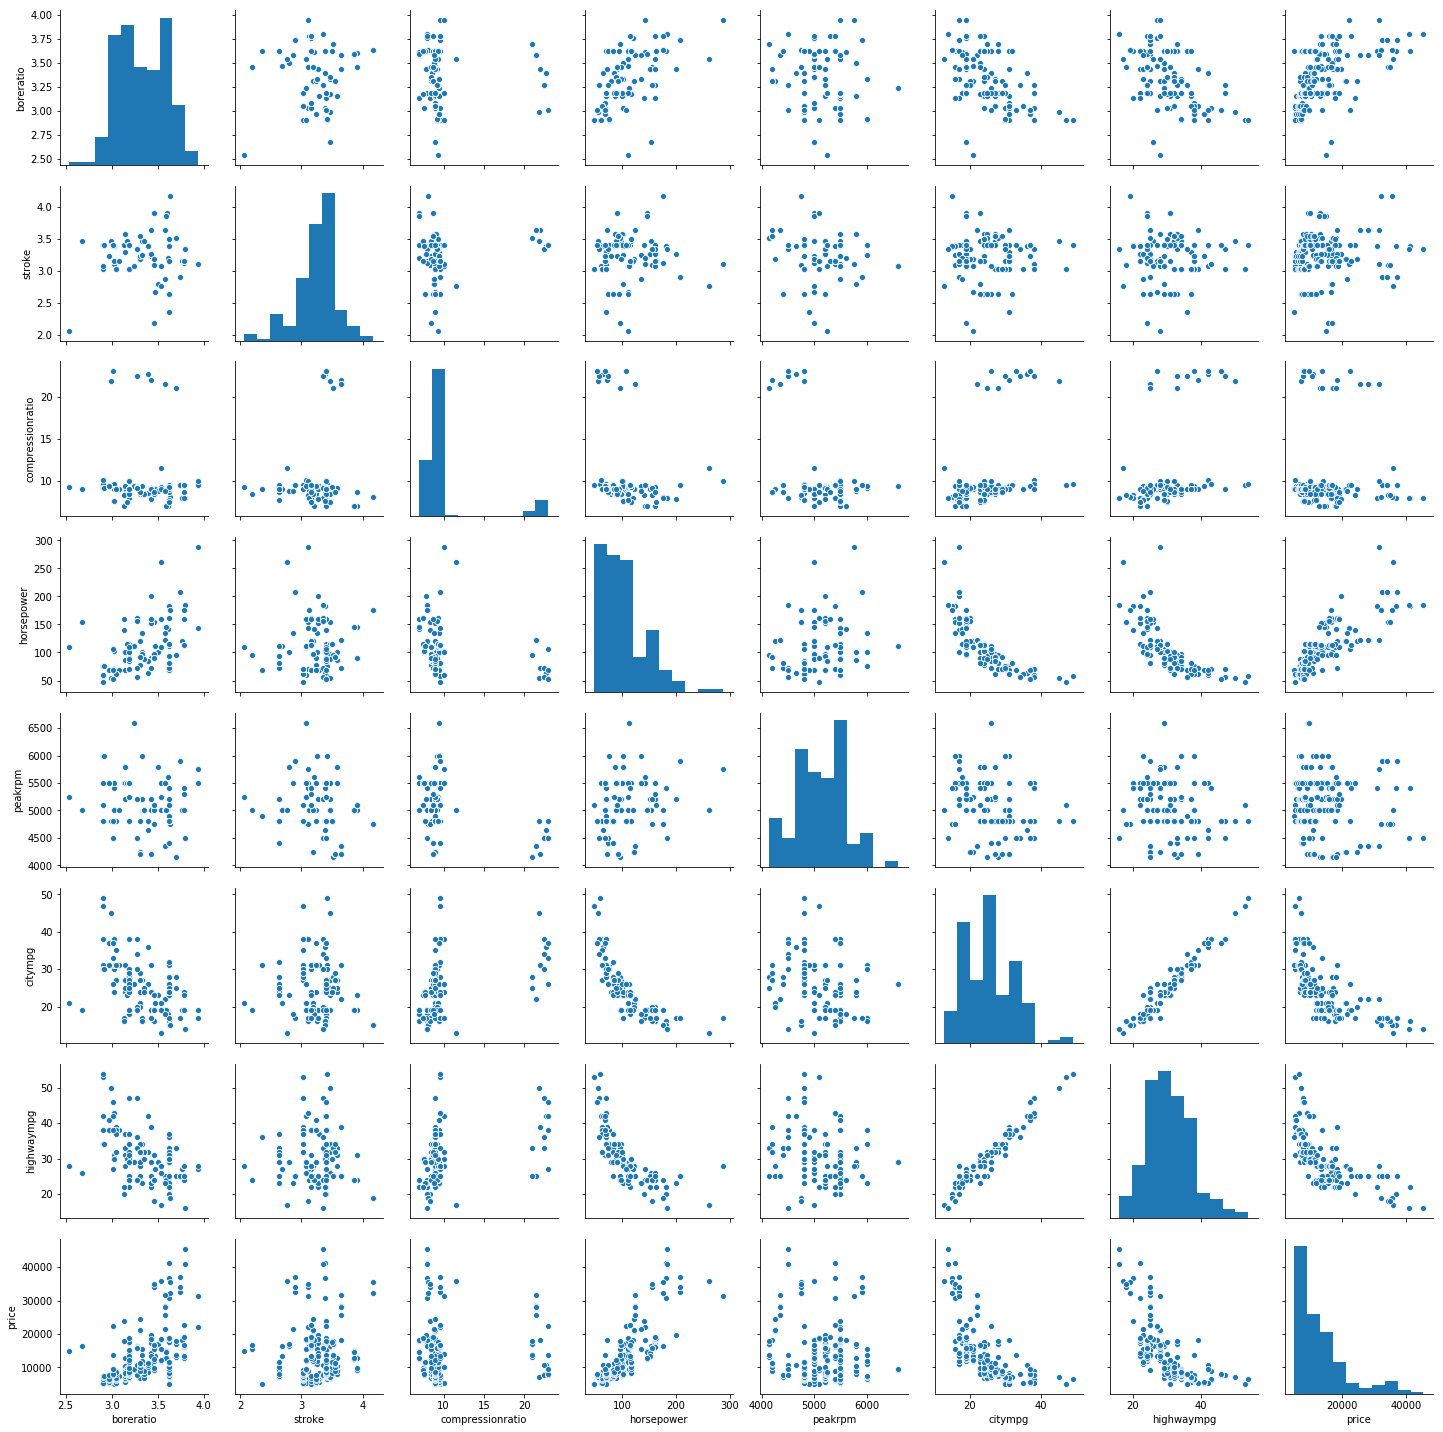

In [227]:
sns.pairplot(carprice, vars= num_var2)

plt.show()

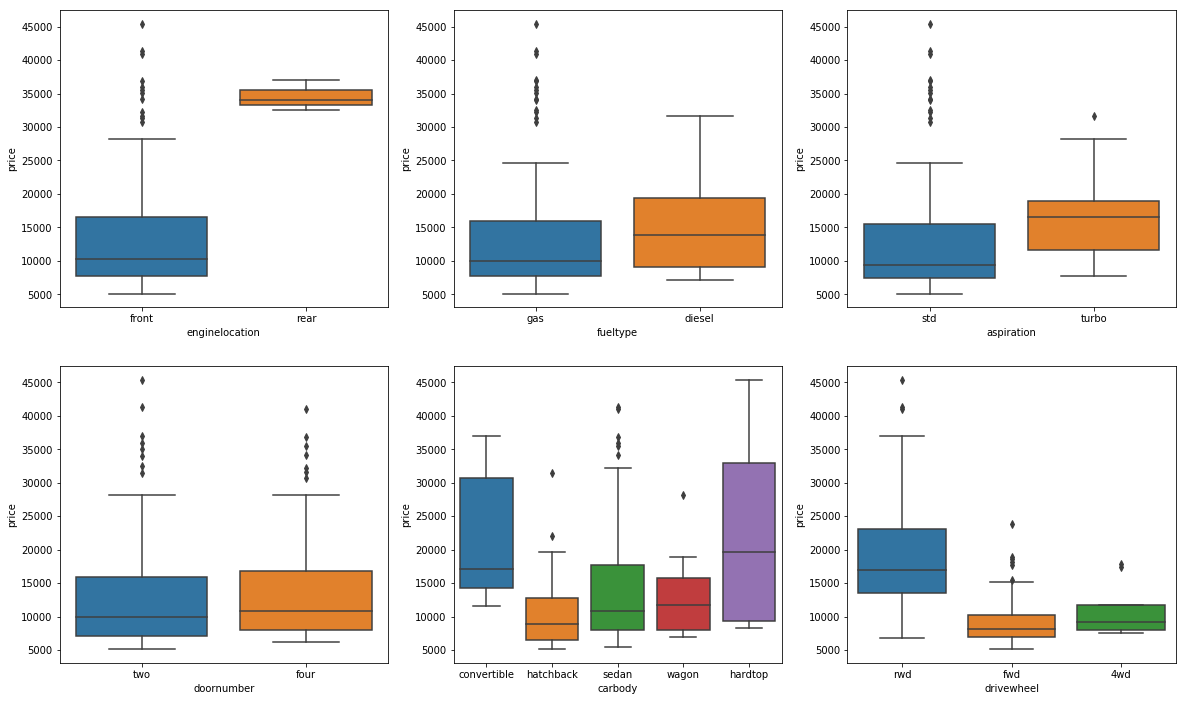

In [228]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(2,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(2,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(2,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.subplot(2,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(2,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.show()

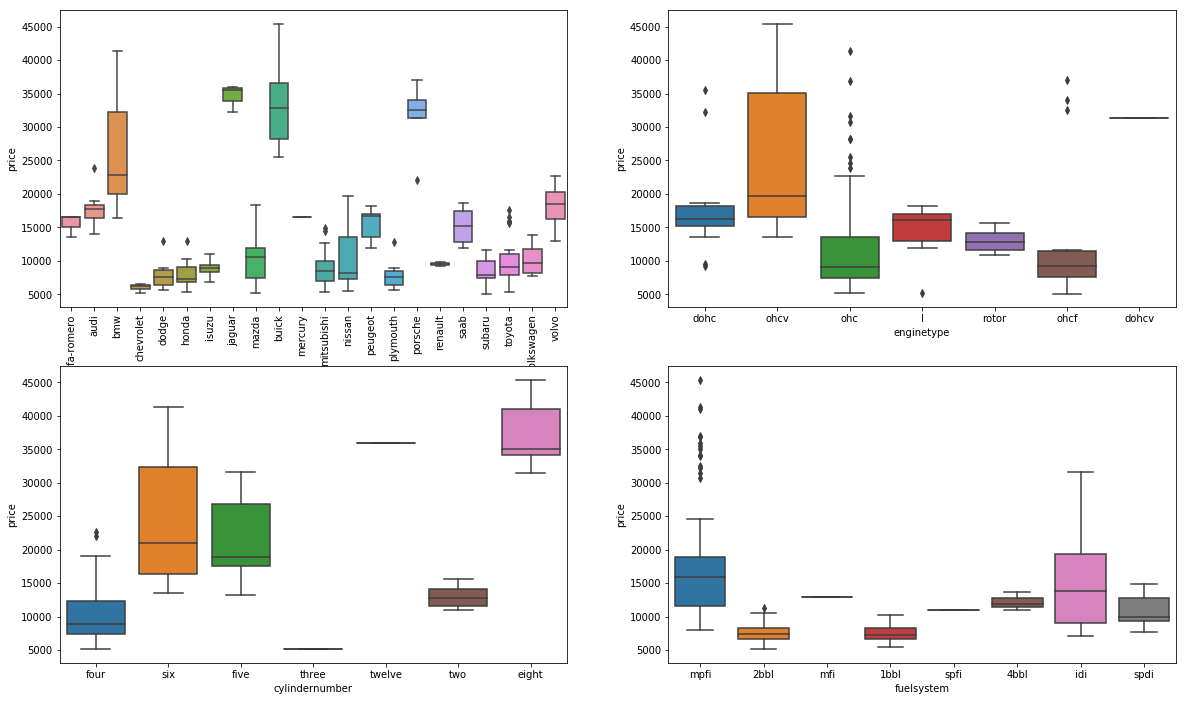

In [229]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
plt.xticks(rotation='vertical')
sns.boxplot(x = 'CarName', y = 'price', data = carprice)
plt.subplot(2,2,2)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(2,2,3)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(2,2,4)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.show()

#### Creation of dummies

In [230]:
# Get the dummy variables for the categorical var and store it in a new variable - 'dummies'
dummies = pd.get_dummies(carprice[categorical_var], drop_first = True)

In [231]:
# Add the results to the original carprice dataframe

pricing = pd.concat([carprice, dummies], axis = 1)

In [232]:
pricing.head()

symboling      CarName fueltype aspiration doornumber      carbody  \
0          3  alfa-romero      gas        std        two  convertible   
1          3  alfa-romero      gas        std        two  convertible   
2          1  alfa-romero      gas        std        two    hatchback   
3          2         audi      gas        std       four        sedan   
4          2         audi      gas        std       four        sedan   

  drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  \
0        rwd          front    88.6000   168.8000   64.1000    48.8000   
1        rwd          front    88.6000   168.8000   64.1000    48.8000   
2        rwd          front    94.5000   171.2000   65.5000    52.4000   
3        fwd          front    99.8000   176.6000   66.2000    54.3000   
4        4wd          front    99.4000   176.6000   66.4000    54.3000   

   curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  \
0        2548       dohc           four         130       mpfi     3.4700   
1        2548       dohc           four         130       mpfi     3.4700   
2        2823       ohcv            six         152       mpfi     2.6800   
3        2337        ohc           four         109       mpfi     3.1900   
4        2824        ohc           five         136       mpfi     3.1900   

   stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg  \
0  2.6800            9.0000         111     5000       21          27   
1  2.6800            9.0000         111     5000       21          27   
2  3.4700            9.0000         154     5000       19          26   
3  3.4000           10.0000         102     5500       24          30   
4  3.4000            8.0000         115     5500       18          22   

       price  CarName_audi  CarName_bmw  CarName_buick  CarName_chevrolet  \
0 13495.0000             0            0              0                  0   
1 16500.0000             0            0              0                  0   
2 16500.0000             0            0              0                  0   
3 13950.0000             1            0              0                  0   
4 17450.0000             1            0              0                  0   

   CarName_dodge  CarName_honda  CarName_isuzu  CarName_jaguar  CarName_mazda  \
0              0              0              0               0              0   
1              0              0              0               0              0   
2              0              0              0               0              0   
3              0              0              0               0              0   
4              0              0              0               0              0   

   CarName_mercury  CarName_mitsubishi  CarName_nissan  CarName_peugeot  \
0                0                   0               0                0   
1                0                   0               0                0   
2                0                   0               0                0   
3                0                   0               0                0   
4                0                   0               0                0   

   CarName_plymouth  CarName_porsche  CarName_renault  CarName_saab  \
0                 0                0                0             0   
1                 0                0                0             0   
2                 0                0                0             0   
3                 0                0                0             0   
4                 0                0                0             0   

   CarName_subaru  CarName_toyota  CarName_volkswagen  CarName_volvo  \
0               0               0                   0              0   
1               0               0                   0              0   
2               0               0                   0              0   
3               0               0                   0              0   
4               0            

In [233]:
# Drop categorical vars as we have created the dummies for it

pricing.drop(categorical_var, axis = 1, inplace = True)
pricing.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0          3    88.6000   168.8000   64.1000    48.8000        2548   
1          3    88.6000   168.8000   64.1000    48.8000        2548   
2          1    94.5000   171.2000   65.5000    52.4000        2823   
3          2    99.8000   176.6000   66.2000    54.3000        2337   
4          2    99.4000   176.6000   66.4000    54.3000        2824   

   enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0         130     3.4700  2.6800            9.0000         111     5000   
1         130     3.4700  2.6800            9.0000         111     5000   
2         152     2.6800  3.4700            9.0000         154     5000   
3         109     3.1900  3.4000           10.0000         102     5500   
4         136     3.1900  3.4000            8.0000         115     5500   

   citympg  highwaympg      price  CarName_audi  CarName_bmw  CarName_buick  \
0       21          27 13495.0000             0            0              0   
1       21          27 16500.0000             0            0              0   
2       19          26 16500.0000             0            0              0   
3       24          30 13950.0000             1            0              0   
4       18          22 17450.0000             1            0              0   

   CarName_chevrolet  CarName_dodge  CarName_honda  CarName_isuzu  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   

   CarName_jaguar  CarName_mazda  CarName_mercury  CarName_mitsubishi  \
0               0              0                0                   0   
1               0              0                0                   0   
2               0              0                0                   0   
3               0              0                0                   0   
4               0              0                0                   0   

   CarName_nissan  CarName_peugeot  CarName_plymouth  CarName_porsche  \
0               0                0                 0                0   
1               0                0                 0                0   
2               0                0                 0                0   
3               0                0                 0                0   
4               0                0                 0                0   

   CarName_renault  CarName_saab  CarName_subaru  CarName_toyota  \
0                0             0               0               0   
1                0             0               0               0   
2                0             0               0               0   
3                0             0               0               0   
4                0             0               0               0   

   CarName_volkswagen  CarName_volvo  fueltype_gas  aspiration_turbo  \
0                   0              0             1                 0   
1                   0              0             1                 0   
2                   0              0             1                 0   
3                   0              0             1                 0   
4                   0              0             1                 0   

   doornumber_two  carbody_hardtop  carbody_hatchback  carbody_sedan  \
0               1                0                  0              0   
1               1                0                  0              0   
2               1                0                  1              0   
3               0                0                  0              1   
4               0                0                  0              1   

   carbody_wagon  drivewheel_fwd  drivewheel_rwd  enginelocation_rear  \
0        

#### Test-train split

In [234]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(pricing, train_size = 0.7, test_size = 0.3, random_state = 300)

### MinMaxScaling

In [235]:
from sklearn.preprocessing import MinMaxScaler
scal = MinMaxScaler()

In [236]:
pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 65 columns):
symboling                205 non-null int64
wheelbase                205 non-null float64
carlength                205 non-null float64
carwidth                 205 non-null float64
carheight                205 non-null float64
curbweight               205 non-null int64
enginesize               205 non-null int64
boreratio                205 non-null float64
stroke                   205 non-null float64
compressionratio         205 non-null float64
horsepower               205 non-null int64
peakrpm                  205 non-null int64
citympg                  205 non-null int64
highwaympg               205 non-null int64
price                    205 non-null float64
CarName_audi             205 non-null uint8
CarName_bmw              205 non-null uint8
CarName_buick            205 non-null uint8
CarName_chevrolet        205 non-null uint8
CarName_dodge            205 non-null uint8

In [237]:
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'price', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
df_train[num_vars] = scal.fit_transform(df_train[num_vars])

In [238]:
df_train.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
145     0.4000     0.2646     0.4612    0.4250     0.5417      0.3964   
49      0.4000     0.4185     0.7552    0.8583     0.0000      0.9550   
122     0.6000     0.1631     0.3910    0.2917     0.2500      0.2727   
126     1.0000     0.0338     0.4149    0.3917     0.3167      0.4919   
146     0.4000     0.2646     0.4836    0.4250     0.4333      0.3111   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
145      0.1774     0.7460  0.2273            0.0438      0.2625   0.2653   
49       1.0000     0.6825  0.2879            0.2812      0.8917   0.3469   
122      0.1396     0.2302  0.5253            0.1500      0.0833   0.5510   
126      0.5019     0.8413  0.3586            0.1562      0.6625   0.7143   
146      0.1774     0.7460  0.2273            0.1250      0.1417   0.2653   

     citympg  highwaympg  price  CarName_audi  CarName_bmw  CarName_buick  \
145   0.3235      0.3514 0.1525             0            0              0   
49    0.0000      0.0270 0.7666             0            0              0   
122   0.5294      0.5946 0.0618             0            0              0   
126   0.1176      0.2432 0.6805             0            0              0   
146   0.4412      0.4324 0.0582             0            0              0   

     CarName_chevrolet  CarName_dodge  CarName_honda  CarName_isuzu  \
145                  0              0              0              0   
49                   0              0              0              0   
122                  0              0              0              0   
126                  0              0              0              0   
146                  0              0              0              0   

     CarName_jaguar  CarName_mazda  CarName_mercury  CarName_mitsubishi  \
145               0              0                0                   0   
49                1              0                0                   0   
122               0              0                0                   0   
126               0              0                0                   0   
146               0              0                0                   0   

     CarName_nissan  CarName_peugeot  CarName_plymouth  CarName_porsche  \
145               0                0                 0                0   
49                0                0                 0                0   
122               0                0                 1                0   
126               0                0                 0                1   
146               0                0                 0                0   

     CarName_renault  CarName_saab  CarName_subaru  CarName_toyota  \
145                0             0               1               0   
49                 0             0               0               0   
122                0             0               0               0   
126                0             0               0               0   
146                0             0               1               0   

     CarName_volkswagen  CarName_volvo  fueltype_gas  aspiration_turbo  \
145                   0              0             1                 1   
49                    0              0             1                 0   
122                   0              0             1                 0   
126                   0              0             1                 0   
146                   0              0             1                 0   

     doornumber_two  carbody_hardtop  carbody_hatchback  carbody_sedan  \
145               0                0                  0              1   
49                1                0                  0              1   
122               0                0                  0              1   
126               1                1                  0              0   
146               0                0                  0              0   



In [239]:
df_train.describe()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
count   143.0000   143.0000   143.0000  143.0000   143.0000    143.0000   
mean      0.5455     0.3389     0.5071    0.4776     0.5118      0.4313   
std       0.2446     0.1954     0.1874    0.1817     0.2062      0.2076   
min       0.0000     0.0000     0.0000    0.0000     0.0000      0.0000   
25%       0.4000     0.1877     0.3940    0.3250     0.3500      0.2872   
50%       0.6000     0.2708     0.4851    0.4417     0.5250      0.3770   
75%       0.7000     0.4431     0.6642    0.5750     0.6458      0.5935   
max       1.0000     1.0000     1.0000    1.0000     1.0000      1.0000   

       enginesize  boreratio   stroke  compressionratio  horsepower  peakrpm  \
count    143.0000   143.0000 143.0000          143.0000    143.0000 143.0000   
mean       0.2579     0.5386   0.5379            0.1896      0.2454   0.4022   
std        0.1694     0.2158   0.1637            0.2385      0.1755   0.2065   
min        0.0000     0.0000   0.0000            0.0000      0.0000   0.0000   
25%        0.1377     0.3730   0.4646            0.0938      0.1104   0.2653   
50%        0.2226     0.5317   0.5556            0.1250      0.1958   0.4286   
75%        0.3208     0.7460   0.6162            0.1500      0.3021   0.5510   
max        1.0000     1.0000   1.0000            1.0000      1.0000   1.0000   

       citympg  highwaympg    price  CarName_audi  CarName_bmw  CarName_buick  \
count 143.0000    143.0000 143.0000      143.0000     143.0000       143.0000   
mean    0.3453      0.3835   0.2162        0.0350       0.0420         0.0350   
std     0.1866      0.1792   0.2114        0.1843       0.2012         0.1843   
min     0.0000      0.0000   0.0000        0.0000       0.0000         0.0000   
25%     0.1765      0.2432   0.0690        0.0000       0.0000         0.0000   
50%     0.3235      0.3784   0.1521        0.0000       0.0000         0.0000   
75%     0.5000      0.4865   0.2893        0.0000       0.0000         0.0000   
max     1.0000      1.0000   1.0000        1.0000       1.0000         1.0000   

       CarName_chevrolet  CarName_dodge  CarName_honda  CarName_isuzu  \
count           143.0000       143.0000       143.0000       143.0000   
mean              0.0070         0.0280         0.0699         0.0140   
std               0.0836         0.1655         0.2559         0.1178   
min               0.0000         0.0000         0.0000         0.0000   
25%               0.0000         0.0000         0.0000         0.0000   
50%               0.0000         0.0000         0.0000         0.0000   
75%               0.0000         0.0000         0.0000         0.0000   
max               1.0000         1.0000         1.0000         1.0000   

       CarName_jaguar  CarName_mazda  CarName_mercury  CarName_mitsubishi  \
count        143.0000       143.0000         143.0000            143.0000   
mean           0.0210         0.0839           0.0070              0.0559   
std            0.1438         0.2782           0.0836              0.2306   
min            0.0000         0.0000           0.0000              0.0000   
25%            0.0000         0.0000           0.0000              0.0000   
50%            0.0000         0.0000           0.0000              0.0000   
75%            0.0000         0.0000           0.0000              0.0000   
max            1.0000         1.0000           1.0000              1.0000   

       CarName_nissan  CarName_peugeot  CarName_plymouth  CarName_porsche  \
count        143.0000         143.0000          143.0000         143.0000   
mean           0.0909           0.0769            0.0420           0.0280   
std            0.2885           0.2674            0.2012           0.1655   
min            0.0000           0.0000            0.0000           0.0000   
25%            0.0000           0.0000            0.0000           0.0000   
50%            0.0000           0.0000            0.0000          

## HeatMap and Correlation Matrix generation

In [240]:
corr_matrix = df_train.corr()

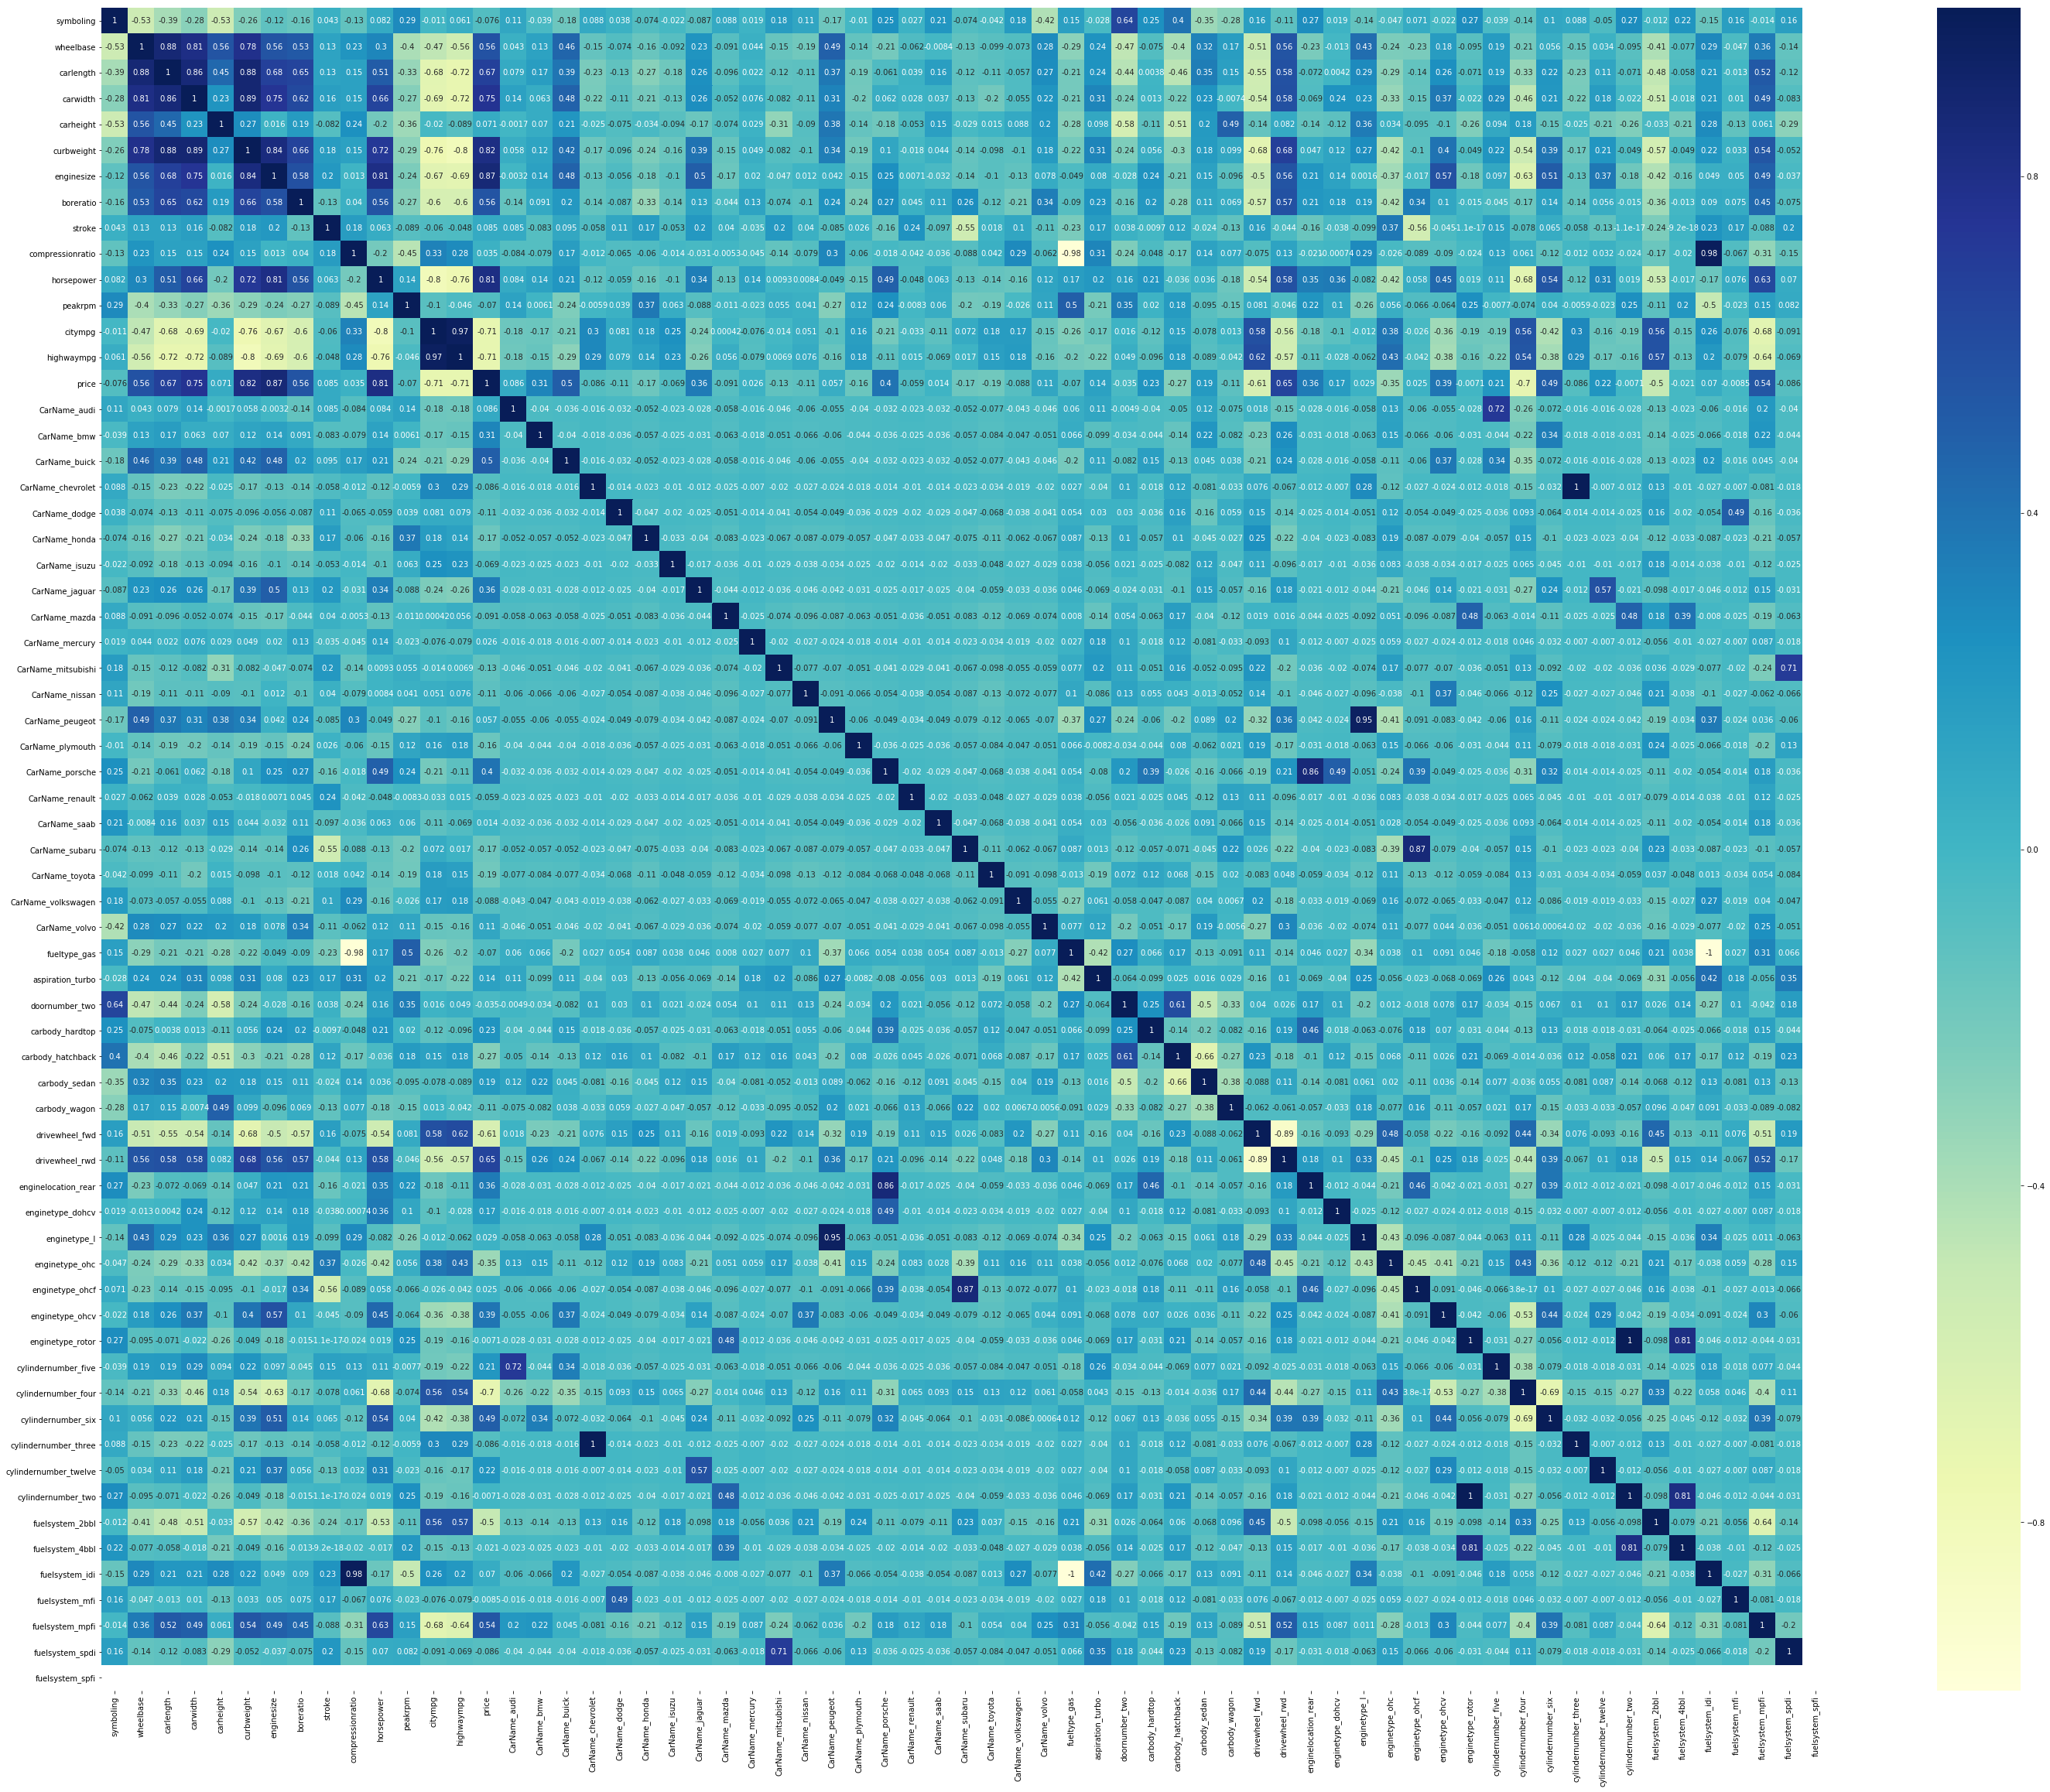

In [241]:
# analysing the corr coeff to check highly correlated relationship

plt.figure(figsize = (50, 40))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [242]:
# finding the corr coeff greater 0.5 in magnitude
var_selected = corr_matrix.loc[(corr_matrix['price'] > 0.5) | (corr_matrix['price'] < (-0.5)), ['price']]

In [243]:
var_selected

price
wheelbase            0.5629
carlength            0.6727
carwidth             0.7520
curbweight           0.8159
enginesize           0.8728
boreratio            0.5625
horsepower           0.8142
citympg             -0.7054
highwaympg          -0.7065
price                1.0000
drivewheel_fwd      -0.6089
drivewheel_rwd       0.6514
cylindernumber_four -0.7012
fuelsystem_mpfi      0.5436

In [244]:
#correlation of all variables with price
corr_matrix['price']

symboling               -0.0758
wheelbase                0.5629
carlength                0.6727
carwidth                 0.7520
carheight                0.0710
curbweight               0.8159
enginesize               0.8728
boreratio                0.5625
stroke                   0.0850
compressionratio         0.0352
horsepower               0.8142
peakrpm                 -0.0702
citympg                 -0.7054
highwaympg              -0.7065
price                    1.0000
CarName_audi             0.0864
CarName_bmw              0.3052
CarName_buick            0.4991
CarName_chevrolet       -0.0858
CarName_dodge           -0.1080
CarName_honda           -0.1746
CarName_isuzu           -0.0689
CarName_jaguar           0.3583
CarName_mazda           -0.0910
CarName_mercury          0.0265
CarName_mitsubishi      -0.1290
CarName_nissan          -0.1112
CarName_peugeot          0.0566
CarName_plymouth        -0.1643
CarName_porsche          0.3981
CarName_renault         -0.0594
CarName_

## Dividing the training dataframe into X and Y 

In [245]:
Y_training = df_train.pop('price')
x_training = df_train

In [246]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(x_training, Y_training)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(x_training, Y_training)

In [247]:
list(zip(x_training.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 41),
 ('wheelbase', False, 29),
 ('carlength', False, 24),
 ('carwidth', True, 1),
 ('carheight', False, 36),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 4),
 ('compressionratio', False, 2),
 ('horsepower', False, 32),
 ('peakrpm', True, 1),
 ('citympg', False, 28),
 ('highwaympg', False, 27),
 ('CarName_audi', False, 9),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('CarName_chevrolet', False, 6),
 ('CarName_dodge', False, 49),
 ('CarName_honda', False, 45),
 ('CarName_isuzu', False, 14),
 ('CarName_jaguar', False, 34),
 ('CarName_mazda', False, 43),
 ('CarName_mercury', False, 35),
 ('CarName_mitsubishi', False, 16),
 ('CarName_nissan', False, 33),
 ('CarName_peugeot', False, 13),
 ('CarName_plymouth', False, 37),
 ('CarName_porsche', False, 8),
 ('CarName_renault', False, 50),
 ('CarName_saab', False, 25),
 ('CarName_subaru', False, 44),
 ('CarName_toyota', False, 46),
 ('CarName_volkswagen', False

In [248]:
col = x_training.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'peakrpm',
       'CarName_bmw', 'CarName_buick', 'enginelocation_rear',
       'enginetype_rotor', 'cylindernumber_three'],
      dtype='object')

In [249]:
x_training.columns[~rfe.support_]

Index(['symboling', 'wheelbase', 'carlength', 'carheight', 'stroke',
       'compressionratio', 'horsepower', 'citympg', 'highwaympg',
       'CarName_audi', 'CarName_chevrolet', 'CarName_dodge', 'CarName_honda',
       'CarName_isuzu', 'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_peugeot',
       'CarName_plymouth', 'CarName_porsche', 'CarName_renault',
       'CarName_saab', 'CarName_subaru', 'CarName_toyota',
       'CarName_volkswagen', 'CarName_volvo', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi

## Building the model using statsmodel api

In [250]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = x_training[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(Y_training,X_train_rfe).fit()   # Running the linear model

#Priting the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           3.07e-71
Time:                        14:03:39   Log-Likelihood:                 210.24
No. Observations:                 143   AIC:                            -398.5
Df Residuals:                     132   BIC:                            -365.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2010 

`Boreratio` is insignificant in presence of other variables; can be dropped

In [251]:
X_train_new = X_train_rfe.drop(["boreratio"], axis = 1)

In [252]:
#adding a constant
X_train_lm = sm.add_constant(X_train_new)

In [253]:
X_train_lm

const  carwidth  curbweight  enginesize  peakrpm  CarName_bmw  \
145 1.0000    0.4250      0.3964      0.1774   0.2653            0   
49  1.0000    0.8583      0.9550      1.0000   0.3469            0   
122 1.0000    0.2917      0.2727      0.1396   0.5510            0   
126 1.0000    0.3917      0.4919      0.5019   0.7143            0   
146 1.0000    0.4250      0.3111      0.1774   0.2653            0   
45  1.0000    0.2750      0.1633      0.1094   0.5102            0   
14  1.0000    0.5500      0.6078      0.3887   0.0408            1   
194 1.0000    0.5750      0.5524      0.3019   0.5102            0   
172 1.0000    0.4417      0.5768      0.3208   0.2653            0   
138 1.0000    0.2583      0.2180      0.1358   0.3061            0   
110 1.0000    0.6750      0.7533      0.3434   0.0000            0   
176 1.0000    0.5167      0.3592      0.2302   0.0204            0   
127 1.0000    0.3917      0.4919      0.5019   0.7143            0   
51  1.0000    0.3250      0.1598      0.1132   0.3469            0   
204 1.0000    0.7167      0.6106      0.3019   0.5102            0   
59  1.0000    0.5167      0.3479      0.2302   0.2653            0   
148 1.0000    0.4250      0.3615      0.1774   0.2653            0   
144 1.0000    0.4250      0.3479      0.1774   0.2653            0   
18  1.0000    0.0000      0.0000      0.0000   0.3878            0   
34  1.0000    0.3083      0.1815      0.1170   0.7551            0   
116 1.0000    0.6750      0.6843      0.3434   0.0000            0   
62  1.0000    0.5167      0.3576      0.2302   0.2653            0   
48  1.0000    0.7750      1.0000      0.7434   0.2449            0   
47  1.0000    0.7750      1.0000      0.7434   0.2449            0   
29  1.0000    0.5000      0.5132      0.3585   0.3469            0   
159 1.0000    0.3417      0.3053      0.1849   0.1429            0   
186 1.0000    0.4333      0.3053      0.1811   0.4490            0   
180 1.0000    0.5167      0.6373      0.4151   0.4286            0   
65  1.0000    0.4833      0.4585      0.2981   0.3469            0   
112 1.0000    0.6750      0.6843      0.3434   0.0000            0   
53  1.0000    0.3250      0.1773      0.1132   0.3469            0   
130 1.0000    0.5167      0.4232      0.2679   0.3878            0   
104 1.0000    0.6333      0.6140      0.4528   0.4286            0   
109 1.0000    0.6750      0.6757      0.2226   0.3469            0   
132 1.0000    0.5167      0.4538      0.2264   0.4490            0   
187 1.0000    0.4333      0.3223      0.1358   0.1429            0   
200 1.0000    0.7167      0.5679      0.3019   0.5102            0   
75  1.0000    0.6417      0.5516      0.2981   0.3469            0   
17  1.0000    0.8833      0.7824      0.5585   0.5102            1   
190 1.0000    0.3083      0.2843      0.1811   0.5510            0   
137 1.0000    0.5167      0.5272      0.2264   0.5510            0   
142 1.0000    0.4250      0.2723      0.1774   0.1020            0   
21  1.0000    0.2917      0.1505      0.1094   0.5510            0   
189 1.0000    0.3250      0.2971      0.1811   0.5510            0   
52  1.0000    0.3250      0.1618      0.1132   0.3469            0   
139 1.0000    0.2750      0.2452      0.1774   0.1020            0   
11  1.0000    0.3750      0.3518      0.1774   0.6735            1   
28  1.0000    0.3583      0.4061      0.2302   0.3469            0   
167 1.0000    0.4417      0.4081      0.3208   0.2653            0   
82  1.0000    0.5000      0.5217      0.3585   0.3469            0   
40  1.0000    0.1833      0.3429      0.1849   0.6735            0   
135 1.0000    0.5167      0.4926      0.2264   0.4490            0   
3   1.0000    0.4917      0.3293      0.1811   0.5510            0   
70  1.0000    0.9500      0.8852      0.4604   0.0816            0   
68  1.0000    0.8333      0.8774      0.4604   0.0816            0   
111 1.0000    0.6750      0.6156      0.2226   0.3469            0   
119 1.0000    0

In [254]:
lm = sm.OLS(Y_training,X_train_lm).fit()   # Running the linear model

#Printing summary of our linear model
print(lm.summary())

### Calculating the VIF to check for multicollinearity

In [255]:
# Calculating the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const 17.7300
2            curbweight  7.4700
1              carwidth  5.5400
3            enginesize  4.5600
6         CarName_buick  1.4700
7   enginelocation_rear  1.3100
4               peakrpm  1.2900
8      enginetype_rotor  1.1700
9  cylindernumber_three  1.0700
5           CarName_bmw  1.0600

Since all the variable in the above summary are significant - lets re-run the rfe but this time with 8 variables and compare the r2 values

In [256]:
X_train_new = sm.add_constant(X_train_new)
# Re-Running RFE with the output number of the variable equal to 8
lm1 = LinearRegression()
lm1.fit(X_train_new, Y_training)

rfe1 = RFE(lm1, 8)             # running RFE
rfe1 = rfe1.fit(X_train_new, Y_training)

In [257]:
#analysing which variables are included for rfe support and ranking of the variables
list(zip(X_train_new.columns,rfe1.support_,rfe1.ranking_))

[('const', False, 3),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('peakrpm', True, 1),
 ('CarName_bmw', True, 1),
 ('CarName_buick', True, 1),
 ('enginelocation_rear', True, 1),
 ('enginetype_rotor', False, 2),
 ('cylindernumber_three', True, 1)]

In [258]:
col = X_train_new.columns[rfe1.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'peakrpm', 'CarName_bmw',
       'CarName_buick', 'enginelocation_rear', 'cylindernumber_three'],
      dtype='object')

### Building new model using Statsmodel API

In [259]:
# Creating X_test dataframe with RFE selected variables
X_train_new = X_train_new[col]

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(Y_training,X_train_new).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     204.5
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           3.46e-71
Time:                        14:03:39   Log-Likelihood:                 204.32
No. Observations:                 143   AIC:                            -390.6
Df Residuals:                     134   BIC:                            -364.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.2235 

In [260]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
0                 const 17.3600
2            curbweight  7.3100
1              carwidth  5.5300
3            enginesize  4.2000
6         CarName_buick  1.4600
7   enginelocation_rear  1.3000
4               peakrpm  1.2000
8  cylindernumber_three  1.0700
5           CarName_bmw  1.0600

We have not lost the predictive power by reducing the number of variables from 10 to 8.
But again all the variable in the above summary are significant - lets re-run the rfe but this time with 5 variables and compare the r2 values

In [261]:
X_train_new = sm.add_constant(X_train_new)

# Re-Running RFE with the output number of the variable equal to 5
lm1 = LinearRegression()
lm1.fit(X_train_new, Y_training)

rfe1 = RFE(lm1, 5)             # running RFE
rfe1 = rfe1.fit(X_train_new, Y_training)

In [262]:
list(zip(X_train_new.columns,rfe1.support_,rfe1.ranking_))

[('const', False, 5),
 ('carwidth', True, 1),
 ('curbweight', False, 2),
 ('enginesize', True, 1),
 ('peakrpm', False, 4),
 ('CarName_bmw', True, 1),
 ('CarName_buick', False, 3),
 ('enginelocation_rear', True, 1),
 ('cylindernumber_three', True, 1)]

In [263]:
col = X_train_new.columns[rfe1.support_]
col

Index(['carwidth', 'enginesize', 'CarName_bmw', 'enginelocation_rear',
       'cylindernumber_three'],
      dtype='object')

In [264]:
# Creating X_test dataframe with RFE selected variables
X_train_new = X_train_new[col]

# Adding a constant variable 
X_train_new = sm.add_constant(X_train_new)

lm = sm.OLS(Y_training,X_train_new).fit()   # Running the linear model

#Printing the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     234.3
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           2.75e-65
Time:                        14:03:39   Log-Likelihood:                 181.13
No. Observations:                 143   AIC:                            -350.3
Df Residuals:                     137   BIC:                            -332.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1901 

By reducing the variable to 5 we have not lost much predictive power. Lets have a look at the VIF of the above model

In [265]:
# Calculating the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0                 const 9.4700
2            enginesize 2.8100
1              carwidth 2.7300
4   enginelocation_rear 1.2100
5  cylindernumber_three 1.0600
3           CarName_bmw 1.0400

-- Dropping the constant to remove the multicollinearity

In [266]:
X_train_new1 = X_train_new.drop(['const'], axis=1)

In [267]:
# Calculating the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1            enginesize 8.4400
0              carwidth 7.9100
3   enginelocation_rear 1.1700
2           CarName_bmw 1.0800
4  cylindernumber_three 1.0000

As per the lr.summary above all the variables are significant and their VIFs are less than 10. Hence, this we can consider this for final model.

### Prediction of the y_training variables using training X_training set

In [268]:
y_train_price = lm.predict(X_train_new)

### Plotting the residual to check whether they are zero mean guassian random variable or not

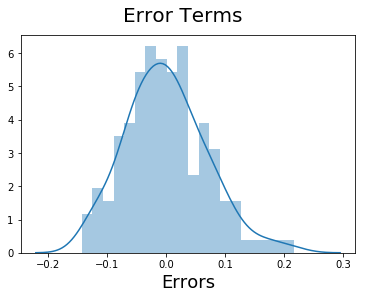

In [269]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_training - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

`MinMaxScaling` of the test set

In [270]:
num_vars = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'price', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']
#applying transformation only on the test set
df_test[num_vars] = scal.transform(df_test[num_vars])

In [271]:
df_test.head()

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
83      1.0000     0.2308     0.4791    0.5000     0.2000      0.5559   
169     0.8000     0.3077     0.5239    0.4417     0.3500      0.4123   
125     1.0000     0.1877     0.4149    0.6667     0.2000      0.5004   
77      0.8000     0.1631     0.2418    0.3417     0.2500      0.1769   
50      0.6000     0.1446     0.2687    0.3250     0.5250      0.1559   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
83       0.3585     0.7222  0.8434            0.0000      0.4042   0.3469   
169      0.3208     0.7460  0.6616            0.1438      0.2833   0.2653   
125      0.3396     1.0000  0.4646            0.1562      0.3958   0.5510   
77       0.1170     0.2302  0.5253            0.1500      0.0833   0.5510   
50       0.1132     0.2778  0.4848            0.1250      0.0833   0.3469   

     citympg  highwaympg  price  CarName_audi  CarName_bmw  CarName_buick  \
83    0.1765      0.2162 0.2421             0            0              0   
169   0.3235      0.3784 0.1209             0            0              0   
125   0.1765      0.2973 0.4195             0            0              0   
77    0.5294      0.5946 0.0266             0            0              0   
50    0.5000      0.4054 0.0019             0            0              0   

     CarName_chevrolet  CarName_dodge  CarName_honda  CarName_isuzu  \
83                   0              0              0              0   
169                  0              0              0              0   
125                  0              0              0              0   
77                   0              0              0              0   
50                   0              0              0              0   

     CarName_jaguar  CarName_mazda  CarName_mercury  CarName_mitsubishi  \
83                0              0                0                   1   
169               0              0                0                   0   
125               0              0                0                   0   
77                0              0                0                   1   
50                0              1                0                   0   

     CarName_nissan  CarName_peugeot  CarName_plymouth  CarName_porsche  \
83                0                0                 0                0   
169               0                0                 0                0   
125               0                0                 0                1   
77                0                0                 0                0   
50                0                0                 0                0   

     CarName_renault  CarName_saab  CarName_subaru  CarName_toyota  \
83                 0             0               0               0   
169                0             0               0               1   
125                0             0               0               0   
77                 0             0               0               0   
50                 0             0               0               0   

     CarName_volkswagen  CarName_volvo  fueltype_gas  aspiration_turbo  \
83                    0              0             1                 1   
169                   0              0             1                 0   
125                   0              0             1                 0   
77                    0              0             1                 0   
50                    0              0             1                 0   

     doornumber_two  carbody_hardtop  carbody_hatchback  carbody_sedan  \
83                1                0                  1              0   
169               1                0                  1              0   
125               1                0                  1              0   
77                1                0                  1              0   
50                1                0                  1              0   



### Making prediction on the test bed(unseen data) created above using test-train split

In [272]:
y_testing = df_test.pop('price')
X_testing = df_test

In [273]:
# columns for final model
final_vars = ['enginesize', 'carwidth', 'enginelocation_rear', 'CarName_bmw', 'cylindernumber_three']

In [274]:
X_testing = X_testing[final_vars]

In [275]:
X_testing_lm = sm.add_constant(X_testing)

In [276]:
y_pred_final = lm.predict(X_testing_lm)

### MODEL EVALUATION

Text(0, 0.5, 'y_pred')

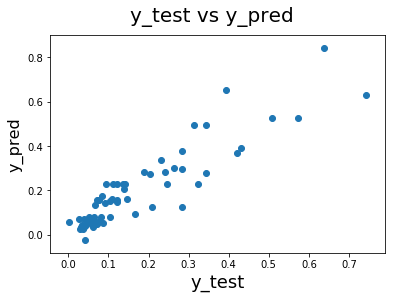

In [277]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_testing,y_pred_final)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [278]:
plt.show()

### Calculating the final r2 score

In [279]:
r2=r2_score(y_pred=y_pred_final, y_true=y_testing)


In [280]:
r2

0.7570024198615867